<a href="https://colab.research.google.com/github/Joanachoong/Externship/blob/main/Youtube_Sample_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install textblob

In [ ]:
from textblob import TextBlob
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv('youtube_cleaned_text.csv')
df

,Unfair Workplace Practices and Lack of Growth Opportunities and Poor Work Conditions and Management Support:,rating_date,employee_length,employee_status,employee_type,flags_ceo_approval,rating_overall,rating_work_life,summary,employee_location,...,advice_to_management,review_pros,review_cons,rating_compensation_benefits,rating_senior_leadership,rating_career_opportunities,cleaned_summary,cleaned_advice,cleaned_reviewPros,cleaned_reviewCons
0,1,2025-06-03T00:00:00.000Z,0,REGULAR,Current employee,NaN,3,0,Amazon,"Richmond, VA",...,don’t micro manage,not interactive \ncan leave or take off whenev...,inhumane \ndraining physically &amp; mentally,0,0,0,amazon,don’t micro manage,interactive leave take whenever long time easy...,inhumane draining physically amp mentally
1,2,2025-05-29T00:00:00.000Z,1,CONTRACT,"Current employee, less than 1 year",APPROVE,4,3,Good,"Brampton, ON",...,Remove all attitude manager from warehouse,good and easy work enviorment,"Sticks rules and completing targets any how, o...",5,3,5,good,remove attitude manager warehouse,good easy work enviorment,sticks rules completing targets otherwise get ...
2,3,2025-05-28T00:00:00.000Z,1,REGULAR,"Current employee, less than 1 year",APPROVE,5,5,Good experience,"Bolton, ON",...,NaN,"help to grow , good pay ,","limited opportunities for advancement,No clear...",5,5,5,good experience,,help grow good pay,limited opportunities advancementno clear path...
3,4,2025-05-26T00:00:00.000Z,2,PART_TIME,Current employees,APPROVE,3,2,Dhdh,"Swedesboro, NJ",...,NaN,Plenty of work\nMeet new people,Tough on the body\nLabor intensive,2,2,3,dhdh,,plenty work meet new people,tough body labor intensive
4,5,2025-05-23T00:00:00.000Z,0,REGULAR,Current employee,NaN,4,0,Good Pay rate,"Whitby, ON",...,NaN,Good Holiday pay \nAdditional benefits for per...,Not hiring permanent employees directly,0,0,0,good pay rate,,good holiday pay additional benefits permanent...,hiring permanent employees directly
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,123,2024-11-20T00:00:00.000Z,0,REGULAR,Former employee,NaN,2,3,nothign,"St. Thomas, ON",...,NaN,good pay and nice shift hours,politics and partiality play a major role,4,1,2,nothign,,good pay nice shift hours,politics partiality play major role
122,124,2024-11-19T00:00:00.000Z,2,REGULAR,Former employees,NaN,3,1,General,"Dartford, England",...,NaN,Flexible working schedules and good pay,Extremely physical. Employees treated as machi...,4,3,4,general,,flexible working schedules good pay,extremely physical employees treated machine s...
123,125,2024-11-18T00:00:00.000Z,0,REGULAR,Former employee,NaN,1,1,Review,"Ottawa, ON",...,Treat associates with respect and dignity. Fos...,Good benefits.\nValuable working experience.\n...,Poor management support.\nLack of understandin...,1,1,1,review,treat associates respect dignity foster suppor...,good benefits valuable working experience oppo...,poor management support lack understanding per...
124,126,2025-10-23,3,REGULAR,Former Emplpyee,DSIAPPROVE,0,2,Nepotism and Ethnocentrism,"St. Thomas, ON",...,NaN,PTO and task are easy to lean pays the bills,Almost 99% of workers are Indian/South Asian T...,0,0,0,nepotism ethnocentrism,,pto task easy lean pays bills,almost 99 workers indiansouth asian tough get ...


In [ ]:
df['sentiment_polarity'] = df['cleaned_summary'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['sentiment_subjectivity'] = df['cleaned_summary'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

In [ ]:
def label_sentiment(score):
    if score > 0.1:
        return 'positive'
    elif score < -0.1:
        return 'negative'
    else:
        return 'neutral'

df['sentiment_label'] = df['sentiment_polarity'].apply(label_sentiment)
df

,Unfair Workplace Practices and Lack of Growth Opportunities and Poor Work Conditions and Management Support:,rating_date,employee_length,employee_status,employee_type,flags_ceo_approval,rating_overall,rating_work_life,summary,employee_location,...,rating_compensation_benefits,rating_senior_leadership,rating_career_opportunities,cleaned_summary,cleaned_advice,cleaned_reviewPros,cleaned_reviewCons,sentiment_polarity,sentiment_subjectivity,sentiment_label
0,1,2025-06-03T00:00:00.000Z,0,REGULAR,Current employee,NaN,3,0,Amazon,"Richmond, VA",...,0,0,0,amazon,don’t micro manage,interactive leave take whenever long time easy...,inhumane draining physically amp mentally,0.000000,0.000000,neutral
1,2,2025-05-29T00:00:00.000Z,1,CONTRACT,"Current employee, less than 1 year",APPROVE,4,3,Good,"Brampton, ON",...,5,3,5,good,remove attitude manager warehouse,good easy work enviorment,sticks rules completing targets otherwise get ...,0.700000,0.600000,positive
2,3,2025-05-28T00:00:00.000Z,1,REGULAR,"Current employee, less than 1 year",APPROVE,5,5,Good experience,"Bolton, ON",...,5,5,5,good experience,,help grow good pay,limited opportunities advancementno clear path...,0.700000,0.600000,positive
3,4,2025-05-26T00:00:00.000Z,2,PART_TIME,Current employees,APPROVE,3,2,Dhdh,"Swedesboro, NJ",...,2,2,3,dhdh,,plenty work meet new people,tough body labor intensive,0.000000,0.000000,neutral
4,5,2025-05-23T00:00:00.000Z,0,REGULAR,Current employee,NaN,4,0,Good Pay rate,"Whitby, ON",...,0,0,0,good pay rate,,good holiday pay additional benefits permanent...,hiring permanent employees directly,0.700000,0.600000,positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,123,2024-11-20T00:00:00.000Z,0,REGULAR,Former employee,NaN,2,3,nothign,"St. Thomas, ON",...,4,1,2,nothign,,good pay nice shift hours,politics partiality play major role,0.000000,0.000000,neutral
122,124,2024-11-19T00:00:00.000Z,2,REGULAR,Former employees,NaN,3,1,General,"Dartford, England",...,4,3,4,general,,flexible working schedules good pay,extremely physical employees treated machine s...,0.050000,0.500000,neutral
123,125,2024-11-18T00:00:00.000Z,0,REGULAR,Former employee,NaN,1,1,Review,"Ottawa, ON",...,1,1,1,review,treat associates respect dignity foster suppor...,good benefits valuable working experience oppo...,poor management support lack understanding per...,0.000000,0.000000,neutral
124,126,2025-10-23,3,REGULAR,Former Emplpyee,DSIAPPROVE,0,2,Nepotism and Ethnocentrism,"St. Thomas, ON",...,0,0,0,nepotism ethnocentrism,,pto task easy lean pays bills,almost 99 workers indiansouth asian tough get ...,0.000000,0.000000,neutral


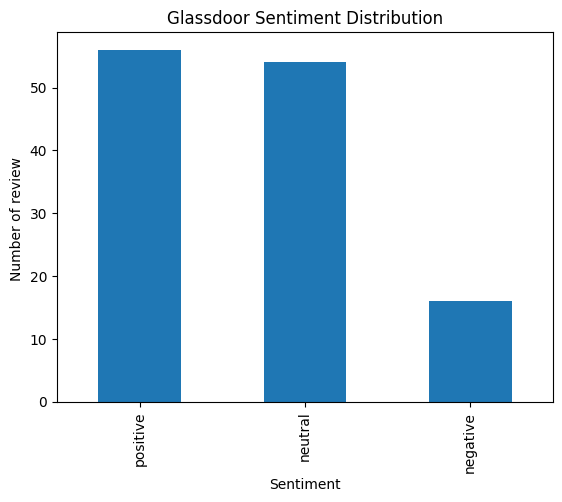

In [ ]:
df['sentiment_label'].value_counts().plot(kind='bar', title="Glassdoor Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Number of review ")
plt.show()

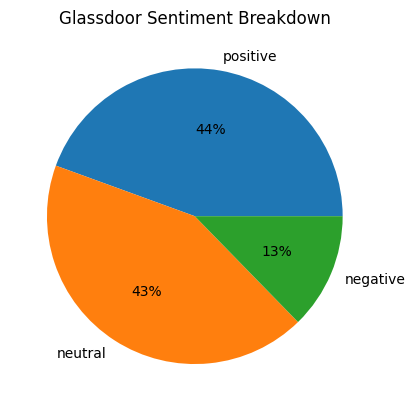

In [ ]:
df['sentiment_label'].value_counts().plot(
    kind='pie',
    autopct='%1.0f%%',
    title="Glassdoor Sentiment Breakdown"
)
plt.ylabel('')
plt.show()

In [ ]:
df.to_csv('glassdoor_sentiment.csv', index=False)
